In [62]:
import pandas as pd
import statistics as stat
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import math
import itertools
%matplotlib inline

MAT 120 Online, Project #3
Fall 2015


Open the data file for my two MAT 120 Online classes. You should print the file as well, since we will be using the data throughout the semester. In case you lose the file, I have uploaded it to Course Content as well.

First, let’s talk about some of the issues inherent in gathering data.  
You will notice that there are some empty cells in the Distance from Barton column. Why? I meant “distance” to mean “number of miles.” Several students interpreted distance to mean “number of minutes.” What was the problem? A poorly worded survey question. My question was not specific enough. What happens? Those data points must be dropped from any analysis. Do not enter zeros. This is a common error. Zero would not imply a missing value, but a distance of 0 miles from Barton. This seems obvious, but it happens! 
What do you do with unusual data values or outliers? Three things: 
The most common cause of an outlier is data entry error. Check the original data and if there is a data entry error, fix it. In other words, “scrub the data.” (Data scrubbing is a much more sophisticated process in the real world, typically involving computer programs developed specifically for this purpose.) I’ve checked our data set; the values are correct. 
The next thing to do is to ask whether the unusual data value indicates something systemically different about the individual being measured. In other words, did the data value come from a different population than you intended to study? For example, in our data we have several students with a 0.000 GPA. (We also had two who left this field blank.) What does this imply? It typically implies that the student is new to college and has not completed classes to begin building a GPA. In a case like this, it is legitimate to drop the data values from the analysis. A 0.000 GPA does not imply a poor student. 
What if the unusual data value is legitimate? For example, we have one student who listed Distance from Barton as 176 miles. This student legitimately lives that far from GTC. The student has a remote proctor for tests. (I have had online students in Afghanistan and China in the past!) In a case like this, you cannot drop the data value just because you don’t like it. That would be unethical.


<h1>Well to get started I've got to read the file in.

In [4]:
data = open("assignment3data.txt") # Read the data in

data = data.read().split('\n') # Splits the data by newline into rows

cleaned_data = [row.split(' ') for row in data] # This splits our data into columns

In [5]:
print(cleaned_data[2]) # First Column for example purposes

['Chevrolet', '21', '1', 'Brown', '3.000', '5']


Here our the headers for our data


Model of Vehicle, Age (Years), # of Children, Eye Color, GPA, Amount of Sleep (Hours), Distance from Barton (Miles)


In [6]:
cleaned_data[45] = ['Hyundai', '32', '0', 'Dark Brown', '2.000', '5.5', '43.1'] # Just a bit of error handling one had
# a dark brown instead of one color, found it using a for loop to check for consistant size

In [41]:
data_table = pd.DataFrame(cleaned_data, columns=["Model of Vehicle",
                                                 "Age (Years)",
                                                 "# of Children",
                                                 "Eye Color",
                                                 "GPA",
                                                 "Amount of Sleep (Hours)",
                                                 "Distance from Barton (Miles)"])

In [42]:
data_table.head()

,Model of Vehicle,Age (Years),# of Children,Eye Color,GPA,Amount of Sleep (Hours),Distance from Barton (Miles)
0,Chevrolet,43,2,Brown,3.610,7,6.59
1,Pontiac,22,1,Brown,3.700,6,None
2,Chevrolet,21,1,Brown,3.000,5,None
3,GMC,29,1,Brown,1.667,6,None
4,Dodge,21,0,Blue,2.760,10,10


In [43]:
data_table.tail()

,Model of Vehicle,Age (Years),# of Children,Eye Color,GPA,Amount of Sleep (Hours),Distance from Barton (Miles)
52,Mazda,58,3,Brown,6.5,14,None
53,Ford,21,1,Brown,2.900,6,1
54,Honda,23,2,Black,2.800,8,30.5
55,Kia,24,0,Green,2.600,5,10
56,,None,None,None,None,None,None


In [45]:
data_table = data_table.drop(56) # The last row is just gunk from the data being copied off a PDF lets drop it

<h3>Sweet we can do alot from here</h3>

Create a histogram of the data. Start with the youngest age (18) and make your categories six years wide. You may do this using your calculator and reproduce the histogram below or do this by hand. (I suggest the calculator option.) Sketch the histogram by hand (in which case you will need to scan your project and send it to me in PDF format) or using the Word drawing tools.  

Awesome, I can definetly whip this up with Matplotlib

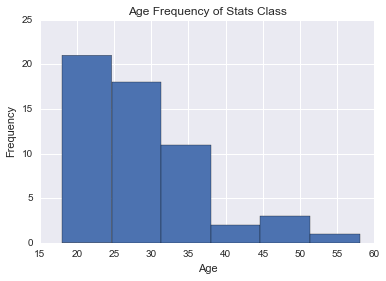

In [11]:
plt.hist([int(age) for age in data_table['Age (Years)']], bins=6)  # Yea! Histograms! This creates the histogram
plt.title("Age Frequency of Stats Class") # Lable for the overall chart
plt.xlabel("Age") # Lable for the x axis
plt.ylabel("Frequency") # Label for the y axis
plt.show() # Lets show it

It seems that our data is squewd to the left, this would tell the analyzer that people taking our class tend to be closer to 25 then 50.  This is not too suprising although that we have ages above 50 is intersting, I think seeing a larger sample on online class students could be fairly intersting.

<h3>Lets take a closer look real quick</h3>

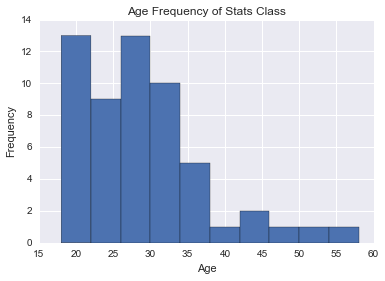

In [12]:
plt.hist([int(age) for age in data_table['Age (Years)']], bins=10)  # Lets Take a closer look real quick
plt.title("Age Frequency of Stats Class") # Lable for the overall chart
plt.xlabel("Age") # Lable for the x axis
plt.ylabel("Frequency") # Label for the y axis
plt.show() # Lets show it

It is intersting that the data spikes around 20 and 30.  This shows how data can be shown in different manners to come to different truths

<h5>Use the capabilities of your calculator to compute the following (include units):</h5>

Mean

Standard deviation

Variance

Range

Five-number summary

Interquartile range


<h5>I'm going to do it in code using the equation to understand it and then check it with Python's Statistics Library or Numpy</h5>

In [39]:
# The Mean

age_mean = sum([int(age) for age in data_table['Age (Years)']]) / len(data_table['Age (Years)'])

print("Here is the mean age for the class ", age_mean, "in years")

# Lets check the answer with numpy

assert age_mean == np.mean([int(age) for age in data_table['Age (Years)']]) # No assertion error means the answer is right
# Awesome, mean is done

Here is the mean age for the class  28.410714285714285 in years


In [37]:
# Standard Deviation

# Get the differences from the value to mean, and square the result
age_squared_diff = [(age_mean - int_age)**2 for int_age in [int(age) for age in data_table['Age (Years)']]]
# This is the final answer if this is the population standard dev
age_pstd_dev = math.sqrt((sum(age_squared_diff)/len(age_squared_diff)))
print("The population standard deviation is", age_pstd_dev, "years")

# Great lets do the sample standard dev which makes a bit more sense for this one
age_sstd_dev = math.sqrt((sum(age_squared_diff)/(len(age_squared_diff) -1 )))
print("The samples standard deviation is", age_sstd_dev, "years")
# Lets check the population standard dev
assert age_pstd_dev == stat.pstdev([int(age) for age in data_table['Age (Years)']]) # No assertion errors means this is correct

# Lets check the sample standard dev
assert age_sstd_dev == stat.stdev([int(age) for age in data_table['Age (Years)']]) # No assertion errors means this is correct

print("Since this is just for our class it this would most likely be considered the sample of a larger population")

The population standard deviation is 8.33190251321965 years
The samples standard deviation is 8.407305882849286 years
Since this is just for our class it this would most likely be considered the sample of a larger population


In [52]:
# Variance

# This is the population Variance
population_variance = (sum(age_squared_diff)/len(age_squared_diff))
print("The population variance is", population_variance, "in years^2")


# This is the Sample Variance
sample_variance = (sum(age_squared_diff)/(len(age_squared_diff) -1 ))
print("The sample variance is", sample_variance, "in years^2")

# Lets check the population Variance
assert population_variance == stat.pvariance([int(age) for age in data_table['Age (Years)']]) # No assertion errors means this is correct

# Lets check the sample Variance
assert sample_variance == stat.variance([int(age) for age in data_table['Age (Years)']]) # No assertion errors means this is correct

print("Since this is just for our class it this would most likely be considered the sample of a larger population")

The population variance is 69.42059948979592 in years^2
The sample variance is 70.6827922077922 in years^2
Since this is just for our class it this would most likely be considered the sample of a larger population


In [57]:
# Range

# We already know the youngest age is 18, so we just need to find the oldest age
oldest_age = max([int(age) for age in data_table['Age (Years)']]) # The oldest person is 58 which is found with this code
age_range = oldest_age - 18

# This operation is considered fairly simple, the statistics library/numpy/math standard library don't have a funciton for it
print("The age range for our class is", age_range, "years")

The age range for our class is 40 years


In [189]:
# This gets our data in order
age_list = sorted([int(age) for age in data_table['Age (Years)']])


low_mid = int( round( ( len(age_list) + 1 ) / 4.0 ) - 1 )
q1_num = age_list[low_mid]

nums = age_list
try:
    high_mid = ( len( age_list ) - 1 ) * 0.75
    uq = age_list[ high_mid ]
except TypeError:   #<  There were an even amount of values
    # Make sure to type results of math.floor/ceil to int for use in list indices
    ceil = int( math.ceil( high_mid ) )
    floor = int( math.floor( high_mid ) )
    q3_num = ( nums[ ceil ] + nums[ floor ] ) / 2

quartiles = [q1_num, (stat.median(q2_num)), q3_num]

# Lets check the quartiles, the stats library doesn't have a function to get all the quartiles but we can check Q2
assert stat.median(age_list) == quartiles[1] # No assertion error means the Q2 is correct

print("Here are the quartiles", quartiles)

Here are the quartiles [22, 27.0, 32.5]


In [190]:
# Five-Number Summary

# Lets organize our calculations into a Five Numbered Summary
five_number_summary = [min(age_list), quartiles[0], quartiles[1], quartiles[2], max(age_list)]
print("Total Summary:", five_number_summary)

print("\n Break Down \n #####################")
print("\n", "Min Value (Youngest Person):", five_number_summary[0],"\n",
     "First Quartile:", five_number_summary[1],"\n",
     "Second Quartile (Median):", five_number_summary[2],"\n",
     "Third Quartile:", five_number_summary[3],"\n",
     "Max Value (Oldest Person):", five_number_summary[4])

Total Summary: [18, 22, 27.0, 32.5, 58]

 Break Down 
 #####################

 Min Value (Youngest Person): 18 
 First Quartile: 22 
 Second Quartile (Median): 27.0 
 Third Quartile: 32.5 
 Max Value (Oldest Person): 58


In [195]:
# Interquartile Range

# To get the Interquartile Range I'll subract Quartile 3 from Quartile 1
# BTW the reason it say's two on the index is because programming is zero indexed
interquartile_range = quartiles[2] - quartiles[0]
print("The Interquartile Range is", interquartile_range)

The Interquartile Range is 10.5


<h4>Are the values you computed above parameters or statistics? Explain your answer.</h4>

<strong>
Mean
Standard deviation
Variance
Range
Five-number summary
Interquartile range
</strong>

<p> The calculations above are a statistic because they are not giving a numerical description of our population.  This is because our class is a sample of a larger population, aka students at Greenville Tech.</p>

<h4>Determine the lower and upper fences. Are there any outliers in the data set? If so, name the outlier(s).</h4>

In [196]:
# The equation for the lower fence is, q1 - 1.5(IQR)
lower_fence = quartiles[0] - (1.5*interquartile_range)
upper_fence = quartiles[2] + (1.5*interquartile_range)
print(1.5*interquartile_range)
data_table['Age (Years)'] = [int(age) for age in data_table['Age (Years)']]
outliers = pd.DataFrame(data_table[data_table['Age (Years)'] > upper_fence])
print("The Lower Fence is", lower_fence, "years")
print("The Upper Fence is", upper_fence, "years")

print("Because our data is squewed left toward a younger age group the upper fence is quite low")

print("Here are our outliers", )
print("We have", len(outliers),"out of", len(data_table))
outliers

15.75
The Lower Fence is 6.25 years
The Upper Fence is 48.25 years
Because our data is squewed left toward a younger age group the upper fence is quite low
Here are our outliers
We have 2 out of 56


,Model of Vehicle,Age (Years),# of Children,Eye Color,GPA,Amount of Sleep (Hours),Distance from Barton (Miles)
36,Toyota,50,0,Blue,0.000,7,45
52,Mazda,58,3,Brown,6.5,14,None


<h4>Create a modified boxplot (the kind that shows outliers) of the data. You may do this using your calculator and reproduce the boxplot below or do this by hand. Sketch the boxplot by hand (in which case you will need to scan your project and send it to me in PDF format) or using the Word drawing tools.</h4>

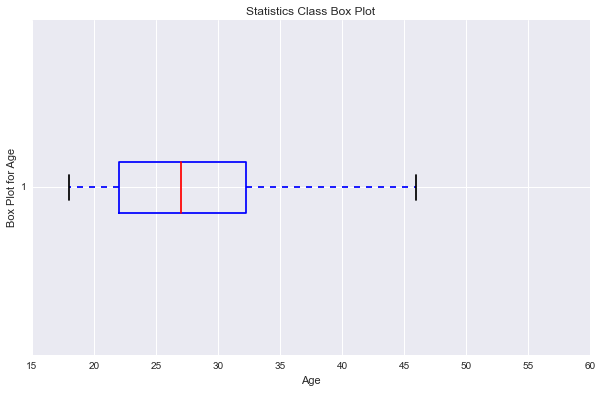

In [197]:
fig, ax1 = plt.subplots(figsize=(10,6))
plt.boxplot(age_list, vert=0)
ax1.set_title('Statistics Class Box Plot')
ax1.set_xlabel('Age')
ax1.set_ylabel('Box Plot for Age')

<ol>
<li>Lower Fence</li>
<li>Q1</li>
<li>Q2(Mean)</li>
<li>Q3</li>
<li>Upper Fence</li>
</ol>

<h3>Does your boxplot support your conclusions is part 7? How?</h3>


<strong><p>Yes, this does support my data in part 7.  The values of the graph match with my data.
<br/>
When I first analyzed my graph I noticed descrepincys knowing that Matplotlib is most likely incorrect I investegating as such which lead me to relieze that my quartiles were off by 1 digit and I found a genuis way to calculate them which I enjoyed understanding. <a href="https://blog.laslabs.com/2013/01/medians-and-quartiles-in-python/"> Its here</a>.  I then reliezed that a typo in my interquartile range lead to another in accuracy.  Needless to say I gained an appreciation for the box plot</p></strong>

<h3>Which measures would you choose to report to describe the center and spread of this distribution, the mean and standard deviation or the median and interquartile range? Why?</h3>


<h5>I would report the Mean, Five Numbered Summary, and the Standard Deviation.</h5>
<strong>
<ol>
<li>I feel the mean is a good measure of the center.</li>
<li>The Fiver Numberd Summary gives the reader a very good idea on the spread of the data</li>
<li>Standard Deviation gives the reader an idea on how close together the data is and allows them to do more calculations</li>
<li> I would also include the number of outliers so the reader knows the extent of the class</li>
</ol>


<h3>Mishaps</h3>
<p>Through out doing this assignment any error I made was put here for my future analyzation.</p>

In [161]:
# Incorrect calculation of quartiles
age_list = sorted([int(age) for age in data_table['Age (Years)']])
quartiles = []
stepper = 0

# This loop below is splitting up the data into quartiles
for item in range(4):
    quartiles.append(age_list[stepper:int(stepper+number_in_each_quartile)])
    stepper += int(number_in_each_quartile)

# Great, now that its divided lets get the mean of each quartile
mean_quartiles = [np.mean(quartile) for quartile in quartiles]

In [ ]:
# Incorrect calculation of quartiles
age_list = sorted([int(age) for age in data_table['Age (Years)']])
number_in_each_quartile = (len([int(age) for age in data_table['Age (Years)']]))/3 # This is 18.66666666668

# Since the middle quartile will have two extra numbers we can divide this up pretty easily
q1_num = age_list[:18]
q2_num = age_list[18:38]
q3_num = age_list[38:56]
# Lets get the quartiles
quartiles = [max(q1_num), (stat.median(q2_num)), min(q3_num)]
print("Here are the quartiles", quartiles)
